# Datasets Desbalanceados

## 1. Datasets Sintéticos

Vamos a comenzar generando un dataset sintético. La ventaja de este enfoque es que podemos controlar muchas características de este dataset. Por ejemplo, la cantidad de features, si hay features correlacionados o no, la separación entre clases, el desbalanceo, etc.

Vamos a comenzar generando un dataset, que luego separaremos en un dataset medido y en un dataset no medido. De esta forma, simulamos (de una manera muy inocente) el proceso de medición. Esto se podría hacer mejor: en este proceso de medición podríamos agregar ruido, valores mal medidos, etiquetas intercambiadas, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_classification

La siguiente celda genera los datos con los que vamos a trabajar. 

In [2]:
X_real, y_real = make_classification(n_samples=100000,n_features=4, n_informative=4,
                                     n_redundant=0, n_clusters_per_class=1,n_classes=2,
                                     class_sep=1.0, weights = [0.99], random_state=40)

Y miramos la cantidad de instancias con etiqueta positiva y qué porcentaje del dataset representa.

In [3]:
print(y_real.sum())
print(y_real.sum()/y_real.size)

1470
0.0147


Pasamos a un DataFrame de Pandas para poder aprovechar algunas funcionalidades de la librería.

In [4]:
df_real = pd.DataFrame()

In [5]:
for i in range(X_real.shape[1]):
    df_real['x' + str(i)] = X_real[:,i]
df_real['y'] = y_real  

Como ya viene mezclado al azar, seleccionar las diez mil primeras instancias es equivalente a muestrear al azar el dataset original.

In [6]:
N = 10000
df_medido = df_real[:N]
df_medido.head()

,x0,x1,x2,x3,y
0,3.976821,0.372961,-0.650739,2.073284,0
1,1.629085,-1.059597,-1.654043,0.431430,0
2,1.178563,-0.250376,2.329269,1.370564,0
3,1.093868,-1.616160,1.727165,1.464183,0
4,-0.652038,-2.527268,1.589253,1.248053,0


Y dejamos el resto de los los datos como instancias 'no medidas'.

In [7]:
df_no_medido = df_real[N:].reset_index(drop = True)
df_no_medido.head()

,x0,x1,x2,x3,y
0,0.482545,-0.448791,-0.812647,0.595696,0
1,5.544468,-1.917801,0.870708,3.020132,0
2,2.154670,-1.124450,0.215696,1.889750,0
3,2.290953,-0.976496,0.518059,1.531779,0
4,3.191610,-0.883649,1.206954,2.068909,0


¿Cuántas instancias positivas y qué porcentaje hay en cada dataset?

In [8]:
print(df_medido.y.sum())
print(df_medido.y.sum()/df_medido.size)

print(df_no_medido.y.sum())
print(df_no_medido.y.sum()/df_no_medido.size)

162
0.00324
1308
0.0029066666666666668


### Exploración de los datos

Miremos cómo es el dataset con el que vamos a trabajar, `df_medido`.

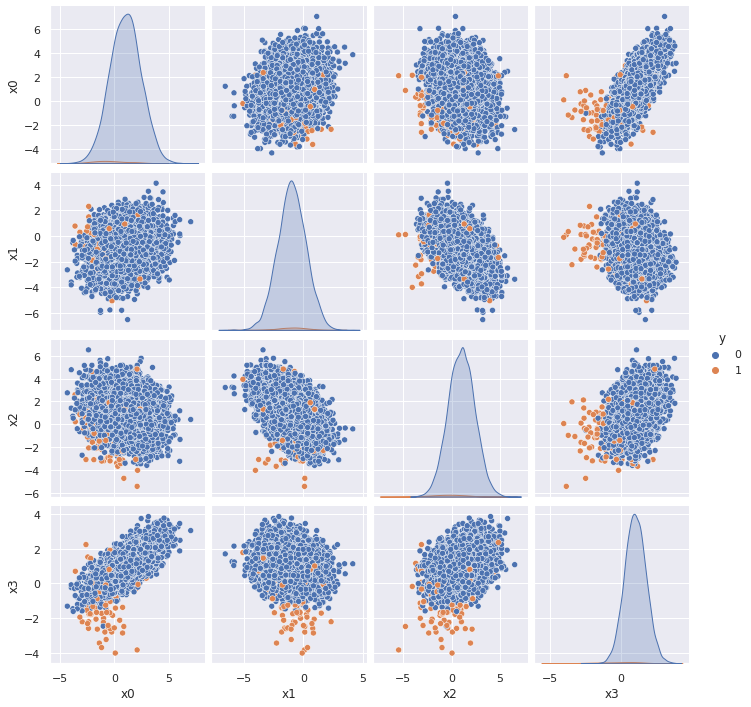

In [9]:
sns.pairplot(data = df_medido, vars = df_medido.columns[:-1], hue = 'y')

Y cómo queda la tabla de correlaciones.

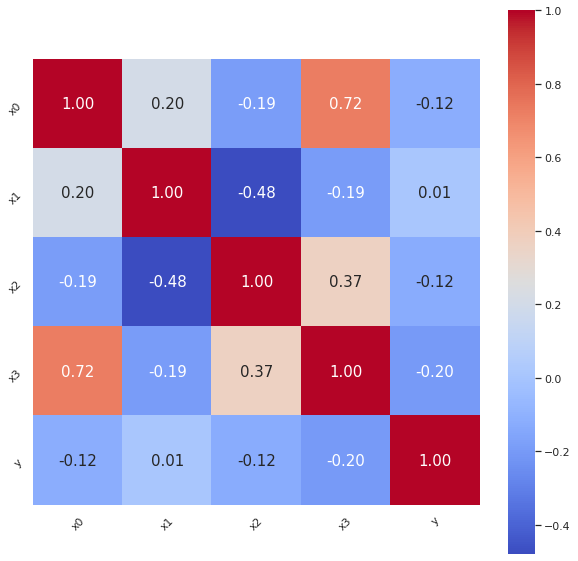

In [10]:
corr = df_medido.corr('pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_medido.columns, 
           yticklabels= df_medido.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

¿Cuáles atributos serán buenos predictores?

**Ejercicio:** Familiarizarse con la función que genera los datos. Cambiar algunos de sus parámetros y volver a correr. 

**Para pensar**: ¿Qué pasa con la tabla de correlaciones a medida que la prevalencia de la clase positiva disminuye?

## 2. Entrenamiento Modelo Uno

Vamos a entrenar un primer modelo de árbol de decisión y evaluarlo usando exactitud. Para ello:

Seleccionamos variables predictoras y etiquetas

In [11]:
X = df_medido.drop('y', axis = 1).values
y = df_medido.y.values

Hacemos un `train_test_split`

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)

Observamos cómo son las distribuciones de las variables predictoras

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


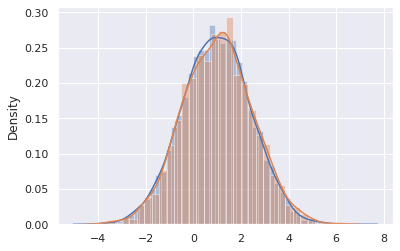

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


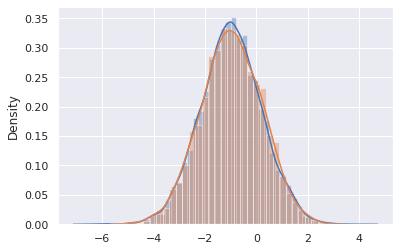

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


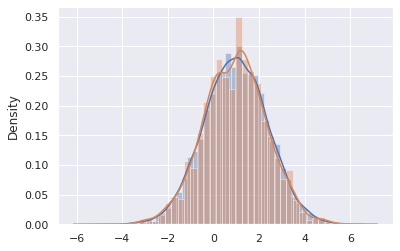

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


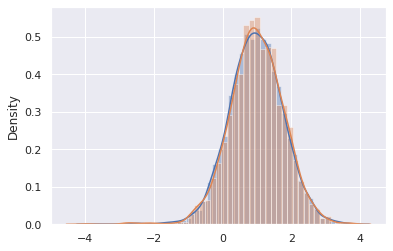

In [13]:
for i in range(X_train.shape[1]):
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

Y la proporción de etiquetas positivas en los datos de train y test.

In [14]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.01625
Proporcion de etiquetas positiva en los datos de Test:  0.016


### Entrenamiento del modelo

Vamos a hacer una curva de validación para elegir la mejor profundidad para el árbol de decisión. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [16]:
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    tree_scores = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

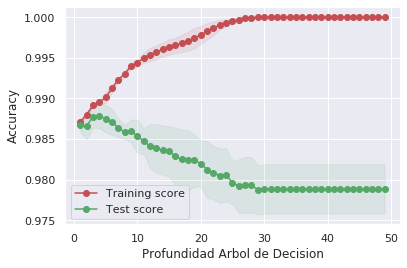

In [17]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

¿Cuál profundidad usarían? ¿Cuál es el *benchmark* de este problema?

Entrenemos un árbol de profundidad tres y evaluémoslo en el conjunto de test.

In [18]:
clf_1 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf_1.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf_1.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.989125
Accuracy sobre conjunto de Test: 0.9875


¿Es un buen modelo? Veamos la matriz de confusión en cada conjunto.

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[7867,    3],
       [  84,   46]])

In [21]:
confusion_matrix(y_test, y_test_pred)

array([[1966,    2],
       [  23,    9]])

¿Cuáles son sus aciertos, Falsos Positivos y Falsos Negativos?¿Es lo mismo si nos interesa la clase 0 que la clase 1? En el caso de un examen médico, ¿un FP tiene el mismo costo que un FN?

**Ejercicio:** calcular la precisión, exhaustividad (recall) y F-Score de este modelo para cada clase sobre el conjunto de Test. Pueden hacerlo a partir de la matriz de confusión o usando funciones que ya están incorporadas en Scikit-Learn.

In [22]:
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 1))

(0.9033091091914622, 0.6401168699186992, 0.7061433667742182, None)
(0.9875, 0.9875, 0.9875, None)
(0.9857123268887975, 0.9875, 0.9844808434860799, None)
(0.9884364002011061, 0.9989837398373984, 0.9936820823856457, None)
(0.8181818181818182, 0.28125, 0.41860465116279066, None)


### ¿Y si lo ponemos "en producción"?

Una de las ventajas de trabajar con datos sintéticos es que podemos ver cómo desempeñaría nuestro modelo si lo ponemos en producción.

In [23]:
X_no_medido = df_no_medido.drop('y', axis = 1).values
y_no_medido = df_no_medido.y.values

In [24]:
# Predecimos sobre todas las instancias que no vio
y_no_medido_pred = clf_1.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

Accuracy sobre conjunto de Train: 0.9887111111111111


In [25]:
confusion_matrix(y_no_medido, y_no_medido_pred)

array([[88556,   136],
       [  880,   428]])

**Ejercicio:** medir precisión, exhaustividad y F-Score

In [26]:
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

(0.8745129049847127, 0.6628418644545375, 0.7257805968396106, None)
(0.9887111111111111, 0.9887111111111111, 0.9887111111111111, None)
(0.986799069852716, 0.9887111111111111, 0.9864913818239607, None)
(0.990160561742475, 0.9984666035268119, 0.9942962364142639, None)
(0.7588652482269503, 0.327217125382263, 0.45726495726495725, None)


**Ejercicio:** repetir para un modelo de vecinos más cercanos.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,50,1)

for vecinos in n_vecinos:
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

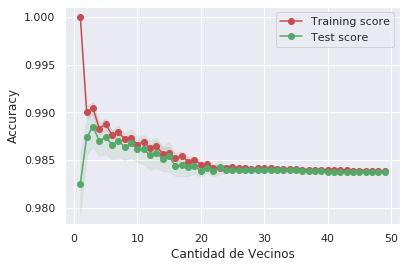

In [29]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

In [30]:
clf_1_knn = KNeighborsClassifier()
clf_1_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf_1_knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf_1_knn.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9895
Accuracy sobre conjunto de Test: 0.9895


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[7868,    2],
       [  82,   48]])

In [33]:
confusion_matrix(y_test, y_test_pred)

array([[1967,    1],
       [  20,   12]])

In [34]:
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 1))

(0.9565057489063529, 0.6872459349593496, 0.7640117994100295, None)
(0.9895, 0.9895, 0.9895, None)
(0.9888648523092408, 0.9895, 0.9873085545722714, None)
(0.9899345747357826, 0.9994918699186992, 0.9946902654867257, None)
(0.9230769230769231, 0.375, 0.5333333333333333, None)


Puesta en producción

In [35]:
# Predecimos sobre todas las instancias que no vio
y_no_medido_pred = clf_1_knn.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

Accuracy sobre conjunto de Train: 0.9891222222222222


In [36]:
confusion_matrix(y_no_medido, y_no_medido_pred)

array([[88614,    78],
       [  901,   407]])

In [37]:
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

(0.9145549527781729, 0.6551413157667169, 0.724247059349641, None)
(0.9891222222222222, 0.9891222222222222, 0.9891222222222222, None)
(0.9877436113550437, 0.9891222222222222, 0.9866508507999527, None)
(0.989934647824387, 0.9991205520227303, 0.9945063886379323, None)
(0.8391752577319588, 0.31116207951070335, 0.4539877300613496, None)


## 3. Balanceando el Dataset

Vamos a balancear el dataset subsampleando la clase más prevalente. Luego, volvemos a analizar los datos y entrenar los modelos.

In [38]:
mask = df_medido.y == 1
mask.sum()

162

In [39]:
df_medido[~mask].sample(n = 4)

,x0,x1,x2,x3,y
4735,1.412704,-2.571837,0.478616,1.325952,0
8884,0.937718,1.236586,-1.030672,0.191237,0
9175,-0.038123,-1.410536,1.573915,1.110718,0
8793,0.720755,-2.199385,3.216015,1.598377,0


In [40]:
df_subsample = pd.concat([df_medido[mask], df_medido[~mask].sample(n = mask.sum())])

In [41]:
df_subsample = df_subsample.sample(frac=1,  random_state=42).reset_index(drop=True)

Hacemos el `pairplot`

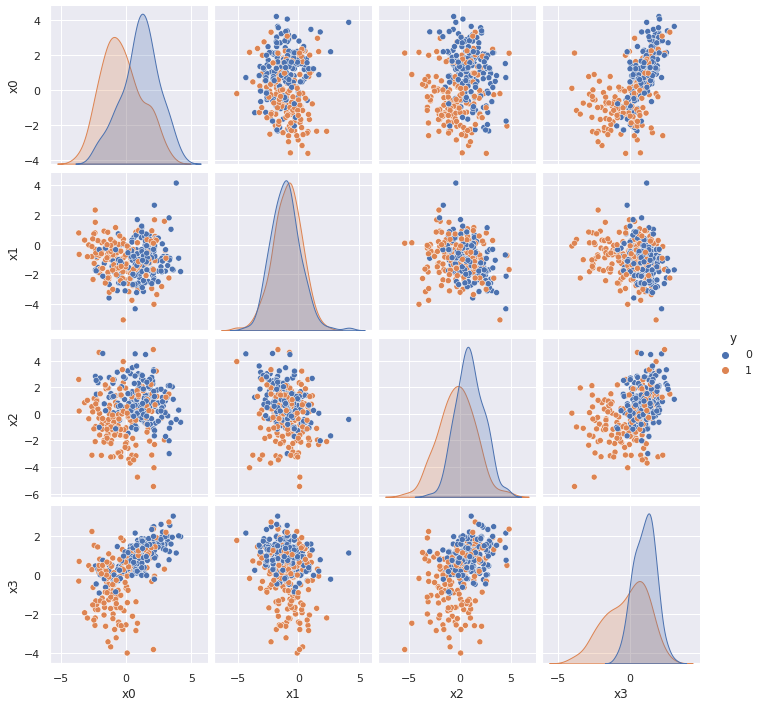

In [42]:
sns.pairplot(data = df_subsample, vars = df_subsample.columns[:-1], hue = 'y')

Y la tabla de correlaciones.

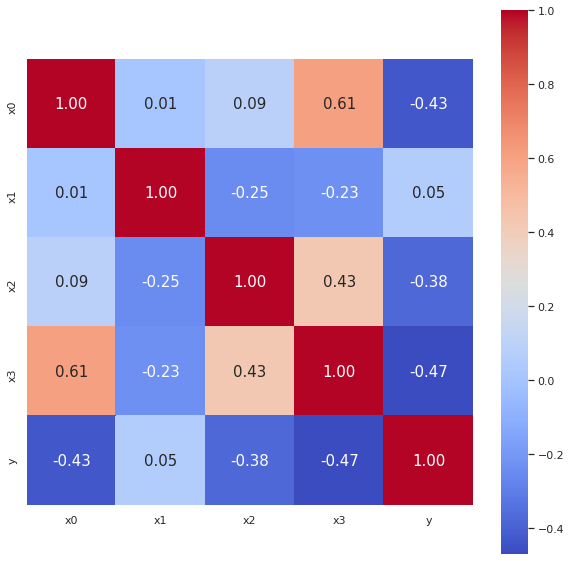

In [43]:
corr = df_subsample.corr('pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_subsample.columns, 
           yticklabels= df_subsample.columns,
           cmap= 'coolwarm')
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.show()

¿Notan algo diferente en la tabla con respecto a la anterior? Si quieren, copien la celda de código de la tabla anterior para poder verlas juntas.

## 4. Entrenamiento Modelo Dos

Seleccionamos variables predictoras y etiquetas

In [45]:
X = df_subsample.drop('y', axis = 1).values
y = df_subsample.y.values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)

Observamos cómo son las distribuciones de las variables predictoras

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


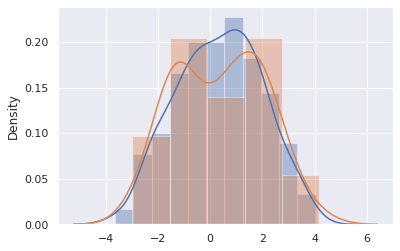

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


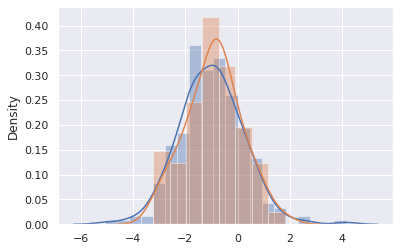

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


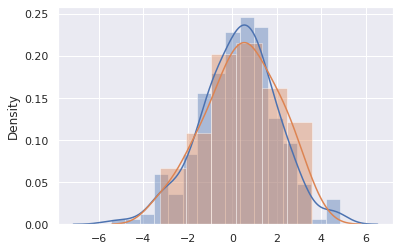

/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


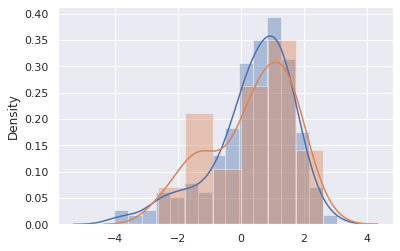

In [47]:
for i in range(X_train.shape[1]):
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

Y la proporción de etiquetas positivas en los datos de train y test.

In [48]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.4980694980694981
Proporcion de etiquetas positiva en los datos de Test:  0.5076923076923077


### Entrenamiento del modelo

Volvemos a hacer la curva de validación.

In [49]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad, random_state=42)
    tree_scores = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

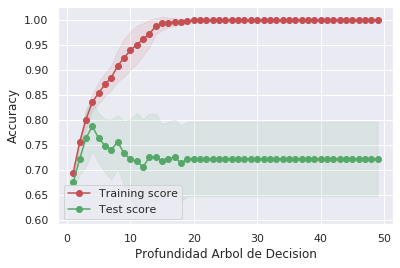

In [50]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

¿Cuál profunidad usarían? Cuál es el *benchmark* de este problema?

Entrenemos un árbol de profundidad tres y evaluémoslo en el conjunto de test.

In [51]:
clf_2 = DecisionTreeClassifier(max_depth = 3, random_state = 40)
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [52]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf_2.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf_2.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7953667953667953
Accuracy sobre conjunto de Test: 0.7846153846153846


¿Es un buen modelo? Veamos la matriz de confusión en cada conjunto.

In [53]:
confusion_matrix(y_train, y_train_pred)

array([[120,  10],
       [ 43,  86]])

In [54]:
confusion_matrix(y_test, y_test_pred)

array([[28,  4],
       [10, 23]])

¿Cuáles son sus aciertos, Falsos Positivos y Falsos Negativos?¿Es lo mismo si nos interesa la clase 0 que la clase 1? 

**Ejercicio:** Igual que antes. Calcular la precisión, exhaustividad (recall) y F-Score de este modelo para cada clase sobre el conjunto de Test. Pueden hacerlo a partir de la matriz de confusión o usando funciones que ya están incorporadas en Scikit-Learn.

In [55]:
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 1))

(0.7943469785575048, 0.7859848484848485, 0.7833333333333333, None)
(0.7846153846153846, 0.7846153846153846, 0.7846153846153847, None)
(0.7952316689158794, 0.7846153846153846, 0.783076923076923, None)
(0.7368421052631579, 0.875, 0.7999999999999999, None)
(0.8518518518518519, 0.696969696969697, 0.7666666666666667, None)


### ¿Y si lo ponemos "en producción"?

In [56]:
X_no_medido = df_no_medido.drop('y', axis = 1).values
y_no_medido = df_no_medido.y.values

In [57]:
# Predecimos sobre todas las instancias que no vio
y_no_medido_pred = clf_2.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

Accuracy sobre conjunto de Train: 0.8943222222222222


In [58]:
confusion_matrix(y_no_medido, y_no_medido_pred)

array([[79649,  9043],
       [  468,   840]])

¿Qué cambió?¿Es mejor o peor este modelo que el anterior árbol de decisión?

**Ejercicio:** medir precisión, exhaustividad y F-Score

In [59]:
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

(0.5395764890094317, 0.7701211221847217, 0.5468894249631915, None)
(0.8943222222222222, 0.8943222222222222, 0.8943222222222222, None)
(0.9809453580908807, 0.8943222222222222, 0.9321254710452779, None)
(0.9941585431306714, 0.8980404095070581, 0.9436582172751453, None)
(0.08499443488819185, 0.6422018348623854, 0.15012063265123762, None)


In [60]:
#clf_2_knn
clf_2.predict_proba(X_no_medido)
#X_no_medido

array([[0.73125   , 0.26875   ],
       [0.73125   , 0.26875   ],
       [0.73125   , 0.26875   ],
       ...,
       [0.04761905, 0.95238095],
       [0.73125   , 0.26875   ],
       [0.73125   , 0.26875   ]])

**Ejercicio:** repetir para un modelo de vecinos más cercanos.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,50,1)

for vecinos in n_vecinos:
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

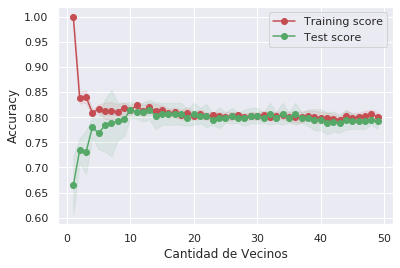

In [63]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

In [64]:
clf_2_knn = KNeighborsClassifier(n_neighbors=14)
clf_2_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [65]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf_2_knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf_2_knn.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.8223938223938224
Accuracy sobre conjunto de Test: 0.7538461538461538


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[126,   4],
       [ 42,  87]])

In [67]:
confusion_matrix(y_test, y_test_pred)

array([[30,  2],
       [14, 19]])

In [68]:
print(precision_recall_fscore_support(y_test, y_test_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='weighted'))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_test, y_test_pred, average='binary', pos_label = 1))

(0.7932900432900433, 0.7566287878787878, 0.7465886939571151, None)
(0.7538461538461538, 0.7538461538461538, 0.7538461538461538, None)
(0.795004995004995, 0.7538461538461538, 0.7459289248762933, None)
(0.6818181818181818, 0.9375, 0.7894736842105263, None)
(0.9047619047619048, 0.5757575757575758, 0.7037037037037038, None)


Puesta en producción

In [69]:
# Predecimos sobre todas las instancias que no vio
y_no_medido_pred = clf_2_knn.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

Accuracy sobre conjunto de Train: 0.9353222222222223


In [70]:
confusion_matrix(y_no_medido, y_no_medido_pred)

array([[83324,  5368],
       [  453,   855]])

In [71]:
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

(0.5659931640449541, 0.796572831987991, 0.5966552431435821, None)
(0.9353222222222223, 0.9353222222222223, 0.9353222222222223, None)
(0.9821348255938414, 0.9353222222222223, 0.9555061483298689, None)
(0.9945927879967056, 0.9394759392053398, 0.9662490070679369, None)
(0.13739354009320265, 0.6536697247706422, 0.2270614792192272, None)


## 6. Curva ROC
Use las funciones `model.predict_proba`, `sklearn.metrics.roc_curve` y `sklearn.metrics.roc_auc_score` de Scikit-learn para realizar los siguientes ejercicios.

**Ejecicios**

1. Elija de "Entrenamiento Modelo Uno" (punto 2) y "Entrenamiento Modelo Dos" (punto 4), los mejores modelos según esa métrica (aquellos con el hiperparámetro que performen mejor en el test set).
2. Para cada uno de estos dos modelos (mejor modelo UNO y mejor modelo DOS), genere las curvas ROC correspondientes. Grafiquelas y compárelas.
3. Para ambos modelos calcule el valor del AUC. Compare el resultado de esta métrica con la de accuracy.

In [72]:
#clf_2_knn
clf_2_knn.predict_proba(X_no_medido)
#X_no_medido

array([[0.71428571, 0.28571429],
       [0.78571429, 0.21428571],
       [0.71428571, 0.28571429],
       ...,
       [0.07142857, 0.92857143],
       [0.64285714, 0.35714286],
       [0.92857143, 0.07142857]])

In [73]:
from sklearn.metrics import roc_curve
y_pred_rt = clf_2_knn.predict_proba(X_no_medido)[:, 1]

fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_no_medido, y_pred_rt)
fpr_rt_lm

array([0.00000000e+00, 6.08848600e-04, 5.07373833e-03, 1.17597980e-02,
       2.17607000e-02, 3.03409552e-02, 4.32959004e-02, 6.05240608e-02,
       1.01519867e-01, 1.99161142e-01, 3.48250124e-01, 5.39451134e-01,
       7.65108465e-01, 9.42046633e-01, 9.98083254e-01, 1.00000000e+00])

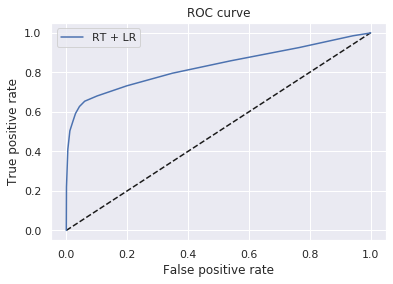

In [74]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_no_medido, y_pred_rt)

0.8293509659446131

In [76]:
from sklearn import metrics
metrics.auc(fpr_rt_lm, tpr_rt_lm)

0.8293509659446131

## 7. Optimización de Hiperparámetros

Use las funciones `GridSearchCV` y `RandomizedSearchCV` de Scikit-learn para realizar los siguientes ejercicios. No olvide explorar su resultados y escribir las conclusiones a las que llegue.

**Ejecicios**
1. Explore el espacio de hiperparámetros con Grid Search de un árbol de decisión entrenado con el dataset sin balancear ("Entrenamiento Modelo Uno") y elija aquellos parámetros que maximicen exactitud. Luego, evalúe la performance en el conjunto de Test y compare con la obtenida por Grid Search. ¿Son diferentes? Si lo son, ¿a qué se debe? Si no lo son, ¿a qué se debe?. Algunas recomendaciones que pueden ser útiles:
   1. Recuerde que el espacio a explorar es definido a través de un diccionario. Algunas variables que puede ser interesante explorar, en el caso del árbol de decisión, son: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.
   1. Los resultados del `GridSearchCV` están en un diccionario que se accede con `.cv_results_`. Si quieren conocer las *llaves* de ese diccionario, pueden usar `.cv_results_.keys()`
   1. `GridSearchCV` entrena al final un modelo con todo el conjunto de Train con los mejores parámetros que encontró. Se puede usar ese modelo para predecir con `.predict()`
   1. Les recomendamos tener a mano la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) de `GridSearchCV` en Scikit-Learn.
    
1. Repita, pero esta evaluando precision, exhaustividad, F-Score y AUC ROC. **Notar** que se pueden evaluar múltiples métricas a la vez. También notar que si no eligen una métrica por sobre las otras, `GridSearchCV` no puede reentrenar con el mejor modelo. ¿Cómo son los hiperparámetros que maximizan cada métrica? Por ejemplo, compare entre precisión y exhaustividad.
1. Repita para el dataset balanceado. 
1. Elija alguno de los casos anteriores y repita, pero esta vez usando Random Search.
1. Si aún tiene tiempo y ganas, repita para un clasificador KNN.

In [77]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,15,20]}#, 'min_samples_split':[0.05,0.10], 'min_samples_leaf':[0.05,0.10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = 'precision')#precision#accuracy
clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
             scoring='precision')

In [78]:
y_no_medido_pred = clf.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

Accuracy sobre conjunto de Train: 0.9445888888888889
(0.5647127124099051, 0.7398845380591405, 0.5942560913243323, None)
(0.9445888888888889, 0.9445888888888889, 0.9445888888888889, None)
(0.980306019436466, 0.9445888888888889, 0.9603190740501955, None)
(0.9927475658429189, 0.9507170883506968, 0.9712778395314147, None)
(0.13667785897689116, 0.5290519877675841, 0.21723434311725004, None)


In [79]:
scores_df = pd.DataFrame(clf.cv_results_)
scores_df.sort_values('rank_test_score',ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.001208,0.000025,0.001489,0.000022,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.913043,0.941176,0.850000,0.769231,0.842105,0.863111,0.060024,1
0,0.001162,0.000047,0.001840,0.000131,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.913043,0.833333,0.850000,0.769231,0.869565,0.847035,0.047148,2
1,0.001173,0.000017,0.001646,0.000047,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.720000,0.833333,0.941176,0.869565,0.863636,0.845542,0.072056,3
11,0.001327,0.000025,0.001479,0.000024,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.666667,0.869565,0.941176,0.863636,0.863636,0.840936,0.091944,4
13,0.001579,0.000066,0.001551,0.000087,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.807692,0.840000,0.842105,0.800000,0.846154,0.827190,0.019317,5


In [80]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [81]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [82]:
confusion_matrix(y_no_medido, y_no_medido_pred)#precision

array([[84321,  4371],
       [  616,   692]])

In [83]:
confusion_matrix(y_no_medido, y_no_medido_pred)#recall

array([[84321,  4371],
       [  616,   692]])

In [84]:
from sklearn.model_selection import RandomizedSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,15,20]}#, 'min_samples_split':[0.05,0.10], 'min_samples_leaf':[0.05,0.10]}
clf_rnd = RandomizedSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = 'recall')#precision
clf_rnd.fit(X_no_medido, y_no_medido)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20]},
                   scoring='recall')

In [85]:
y_no_medido_pred = clf_rnd.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

Accuracy sobre conjunto de Train: 0.9953777777777778
(0.9949219322961802, 0.8428617208217118, 0.9047124333731468, None)
(0.9953777777777778, 0.9953777777777778, 0.9953777777777778, None)
(0.9953735809147561, 0.9953777777777778, 0.9949584802515417, None)
(0.9953871018429146, 0.9999436251296622, 0.9976601608639406, None)
(0.9944567627494457, 0.6857798165137615, 0.8117647058823529, None)


In [86]:
scores_df = pd.DataFrame(clf_rnd.cv_results_)
scores_df.sort_values('rank_test_score',ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,1.084338,0.290984,0.009819,0.003790,15,entropy,"{'max_depth': 15, 'criterion': 'entropy'}",0.459770,0.505747,0.450382,0.389313,0.503817,0.461806,0.042628,1
0,1.242659,0.131379,0.009010,0.000496,20,entropy,"{'max_depth': 20, 'criterion': 'entropy'}",0.455939,0.498084,0.446565,0.396947,0.511450,0.461797,0.040630,2
2,0.716317,0.033295,0.010703,0.006068,10,entropy,"{'max_depth': 10, 'criterion': 'entropy'}",0.432950,0.482759,0.438931,0.374046,0.488550,0.443447,0.041296,3
8,0.664892,0.041270,0.007523,0.000184,9,entropy,"{'max_depth': 9, 'criterion': 'entropy'}",0.421456,0.482759,0.416031,0.370229,0.477099,0.433515,0.041906,4
9,0.490571,0.005990,0.007448,0.000109,10,gini,"{'max_depth': 10, 'criterion': 'gini'}",0.432950,0.478927,0.385496,0.366412,0.469466,0.426650,0.044560,5


In [87]:
clf_rnd.best_params_

{'max_depth': 15, 'criterion': 'entropy'}

In [88]:
clf_rnd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [89]:
confusion_matrix(y_no_medido, y_no_medido_pred)#precision

array([[88687,     5],
       [  411,   897]])

In [90]:
confusion_matrix(y_no_medido, y_no_medido_pred)#recall

array([[88687,     5],
       [  411,   897]])

In [91]:
knn_para = {'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50]}

clf_rnd_knn = RandomizedSearchCV(KNeighborsClassifier(), knn_para, cv=5, scoring = 'precision')#recall #accuracy
clf_rnd_knn.fit(X, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 20, 30, 50],
                                        'weights': ['uniform', 'distance']},
                   scoring='precision')

In [92]:
y_no_medido_pred = clf_rnd_knn.predict(X_no_medido)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_no_medido_pred,y_no_medido))

print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='macro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='micro'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='weighted'))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 0))
print(precision_recall_fscore_support(y_no_medido, y_no_medido_pred, average='binary', pos_label = 1))

Accuracy sobre conjunto de Train: 0.9334555555555556
(0.5647494231188701, 0.7990153637554891, 0.5945793210101478, None)
(0.9334555555555556, 0.9334555555555556, 0.9334555555555557, None)
(0.9821915297868408, 0.9334555555555556, 0.9544636334381815, None)
(0.9946884233948631, 0.9374802687953818, 0.9652374291137256, None)
(0.1348104228428772, 0.6605504587155964, 0.22392121290656988, None)


In [93]:
scores_df = pd.DataFrame(clf_rnd_knn.cv_results_)
scores_df.sort_values('rank_test_score',ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001126,0.000128,0.009951,0.009535,distance,30,"{'weights': 'distance', 'n_neighbors': 30}",0.960000,0.909091,0.947368,0.875000,0.950000,0.928292,0.031778,1
2,0.000984,0.000086,0.010378,0.007315,uniform,50,"{'weights': 'uniform', 'n_neighbors': 50}",0.925926,0.913043,0.950000,0.875000,0.950000,0.922794,0.027819,2
8,0.000914,0.000046,0.006259,0.000190,uniform,8,"{'weights': 'uniform', 'n_neighbors': 8}",0.923077,0.952381,0.947368,0.863636,0.863636,0.910020,0.039148,3
5,0.000866,0.000018,0.006003,0.000039,uniform,6,"{'weights': 'uniform', 'n_neighbors': 6}",0.923077,0.916667,0.894737,0.760000,0.863636,0.871623,0.059555,4
4,0.000866,0.000016,0.002592,0.000066,distance,10,"{'weights': 'distance', 'n_neighbors': 10}",0.827586,0.840000,0.900000,0.840000,0.863636,0.854245,0.025684,5


In [94]:
clf_rnd_knn.best_params_

{'weights': 'distance', 'n_neighbors': 30}

In [95]:
confusion_matrix(y_no_medido, y_no_medido_pred)#recall

array([[83147,  5545],
       [  444,   864]])

In [96]:
confusion_matrix(y_no_medido, y_no_medido_pred)#precision

array([[83147,  5545],
       [  444,   864]])

In [97]:
clf_rnd_knn.best_estimator_

KNeighborsClassifier(n_neighbors=30, weights='distance')

Utilización de VoitingClassifier

In [98]:
clf1 = clf_rnd.best_estimator_
clf2 = clf_rnd_knn.best_estimator_
clf3 = clf.best_estimator_

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
eclf1 = VotingClassifier(estimators=[('ar1', clf1), ('ar2', clf2), ('knn', clf3)], voting='hard')

In [101]:
eclf1 = eclf1.fit(X_train, y_train)

In [102]:
y_pred_eclf1 = eclf1.predict(X_test)

In [103]:
score_eclf1 = accuracy_score(y_test, y_pred_eclf1)
print("Hard Voting Score:",score_eclf1) 

Hard Voting Score: 0.7846153846153846


In [104]:
eclf1.estimators

[('ar1', DecisionTreeClassifier(criterion='entropy', max_depth=15)),
 ('ar2', KNeighborsClassifier(n_neighbors=30, weights='distance')),
 ('knn', DecisionTreeClassifier(criterion='entropy', max_depth=3))]